# Exploratory data analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import pyreadstat
import matplotlib.patches as mpatches

## Analysis of Air Quality Data 2023 Dataset

In [5]:
print("Analysis of Air Quality and Socioeconomic Factors Dataset between 2023 and 2024 dataset")
      
df_2023 = pd.read_csv('data/Merged_AQI_Income_Poverty_Unemployment_Livability.csv')

# Descriptive data
desc_stats = df_2023.describe()
print("Descriptive Statistics:")
print(desc_stats)

# Mode 
mode = df_2023.mode().iloc[0]
print("\nMode:")
print(mode)

# Variance
df_numeric = df_2023.select_dtypes(include=['number'])  # only the columns with the numbers
variance = df_numeric.var()
print("\nVariance:")
print(variance)

# Null Val
null_values = df_2023.isnull().sum()
print("\nNumber of null values in each column:")
print(null_values)

total_null_values = df_2023.isnull().sum().sum()
print("\nTotal number of null values in the whole dataset:")
print(total_null_values)
['mean'],

Analysis of Air Quality and Socioeconomic Factors Dataset between 2023 and 2024 dataset
Descriptive Statistics:
       Arithmetic Mean_PRESS  1st Max Value_PRESS  1st Max Hour_PRESS  \
count           43501.000000         43501.000000        43501.000000   
mean              987.896418           990.425838            9.143054   
std                43.669896            43.691712            7.691686   
min               803.558333           805.900000            0.000000   
25%               983.333333           986.000000            4.000000   
50%              1000.504167          1003.000000            8.000000   
75%              1011.458333          1014.000000           11.000000   
max              1099.816667          1103.000000           23.000000   

       Arithmetic Mean_RH_DP  1st Max Value_RH_DP  1st Max Hour_RH_DP  \
count           43501.000000         43501.000000        43501.000000   
mean               60.263185            78.523091            7.838280   
std        

(['mean'],)

# EDA Findings
The dataset size 43,501 entries, has no missing values at all, maing the dataset reliable for our analysis.

### Descriptive Statistics
The dataset include environmental measurements like pressure, humidity (RH_DP), temperature (TEMP), wind speed, pollutant levels (SO₂, CO, NO₂, Ozone), and AQI scores. Here are the statistics that I found:
- AQI had the mean of 67.80,  minimum of 2.00 and maximum of 660.00. This says that most AQI values are in the moderate range, however the maximum shows some very hazardous air quality perdiods. Most AQI values are between 46.00 (Q1) and 78.00 (Q3), while the Q2 shows that the AQI for hald of the day, the AQI is 58.00, showing typical moderate air conditions. However, the standard deviation of 38.15 shows that air quality varied quite a lot across locations and dates.
- Temperature(F) has the mean of 62.80, muinimum of -11 and maximum of 106, with most days falling between 53.29 and 74.21. This is a very large range of temperatures with extremely cold and hot day, showing the fluctuation between the weather. The standard deviation of 15.12°F reflects moderate daily variation in temperature.
- Humidity(RH_DP) has the mean of 60.26%, minimum os -11.5% and maximum of 100%. Here, we see the condition is mostly humid, with most humidity levels fall between 47.00% and 74.88%. While there are some period with extrem low humidity, which could possibly be the desert-like places. The minimum of -11.5% suggests some sensor error, since humidity cannot physically be negative. The standard deviation of 19.82% shows that humidity varied moderately across the observations.
- The average SO2 (Sulfur Dioxide) concentration is very low at 0.91 ppb, with most values between 0.04 ppb and 0.36 ppb. However, a few extreme spikes up to 700.20 ppb were recorded, likely due to industrial emissions or pollution events. The negative minimum value (-1.23 ppb) is unrealistic and likely a small measurement error. The standard deviation of 18.46 ppb indicates high variability, mostly because of these few extreme SO₂ events.
- CO(Carbon Monoxide) has the mean of 0.27 ppm, minimum of -0.20 ppm and maximum of 1.62 ppm. The average CO value is quite low but has many high peaks through out, hinting the potential relations with traffic/industrial activities and weather conditions. A few negative values (-0.20 ppm) are likely due to sensor noise. The standard deviation is low (0.14 ppm), indicating that CO levels were relatively stable across most days.
- NO2 (Nitrogen Dioxide) has the mean of 9.92, minimum of -2.25 ppb and maximum of 41.00 ppb. The average NO2 level is moderate, which is typical for urban and sururban areas. The minimum here holds negative, which is physically impossible, so it suggests a possibilities that the data comes from sensor error/data collection noise. The maximum value shows that the NO2 is farily high some days, which is also hinting the potential relations with traffic/industrial activities and weather conditions. Q1 shows 25% of the days had NO₂ levels below 5.12 ppb (relatively clean air), median shows that half of the day the NO2 level is below 8.54 ppb, and the Q3 shows that that 75% of the days had NO₂ levels below 13.70 ppb, but some higher spikes exist. While standard deviation of 6.67 bbp shows the moderate daily variablity in NO2 concentrations.

### Mode 
- Most common State: California, most common County: Los Angeles, most common Date: July 27, 2023, most common AQI Category: Moderate. This shows that the dataset is mainly about Califronia.

### Variance 
High Variance Variables: 
- AQI (variance: 1456.97), which the AQI changes a lot between different observations
- 1st Max Value SO₂ (variance: 1161.32), which the SO2 pollution spikes sometimes very high
Low Variance Variables: 
- Temperature and Pressure are more stable compared to AQI or SO₂
This tells us that pollution levels like SO2 are unstable, but environmental factors like temperature and pressure are more stable

# Environment Factor & Socieconomic Factors
The dataset also has another attribute of Median_Income, Unemployment_Rate, Poverty_Rate, Livability_Label showing how environmental and socioeconomic factors are related

In [6]:
# Correct grouping based on 'Livability'
livability_counts = df_2023['Livability'].value_counts()
print("\nNumber of counties by Livability:")
print(livability_counts)

# Calculate mean values grouped by Livability
livability_means = df_2023.groupby('Livability')[['AQI', 'Median_Income', 'Unemployment_Rate', 'Poverty_Rate']].mean()
print("\nMean AQI, Median Income, Unemployment Rate, and Poverty Rate by Livability:")
print(livability_means)

# (Optional) Median values if needed
livability_medians = df_2023.groupby('Livability')[['AQI', 'Median_Income', 'Unemployment_Rate', 'Poverty_Rate']].median()
print("\nMedian AQI, Median Income, Unemployment Rate, and Poverty Rate by Livability:")
print(livability_medians)



Number of counties by Livability:
Livability
Good for Living    34921
Bad for Living      8580
Name: count, dtype: int64

Mean AQI, Median Income, Unemployment Rate, and Poverty Rate by Livability:
                        AQI  Median_Income  Unemployment_Rate  Poverty_Rate
Livability                                                                 
Bad for Living   109.480070   75517.083450           5.513613     11.790478
Good for Living   56.779846   81152.776381           4.917385      9.385691

Median AQI, Median Income, Unemployment Rate, and Poverty Rate by Livability:
                   AQI  Median_Income  Unemployment_Rate  Poverty_Rate
Livability                                                            
Bad for Living   112.0        72336.0                5.8          11.6
Good for Living   55.0        84593.0                5.1           9.9


Base on the statistics above of the socioeconomic factors. There are more number of 'Bad for Living' with 34,921 entries than the 'Good for Living' with the 8,580 entries. With further analysis, we see the 'Good for Living' counties have have almost half the AQI (56.78) compared to "Bad for Living" counties (109.48), indicating much better air quality. 'Good for Living' counties also has the higher average household income ($81,152 vs $75,517) and lower unemployment rate (4.92% vs 5.51%). Poverty levels are also lower in "Good for Living" counties (9.39% vs 11.79%). Further more with the media. The median AQI is also much lower for 'Good for Living' (55) compared to 'Bad for Living' (112), confirming that better air quality is common among livable counties. Median income is much higher for 'Good for Living' ($84,593) than for 'Bad for Living' ($72,336). Median unemployment and poverty rates are better (lower) for 'Good for Living' too.

## Visuliazations for EDA
The 2 visulization below shows the support for 2 analysis:
### 1. Correlation Between AQI and Environmental Factors: how the enviroment factors affect the AQI

Main Findings:
The heatmap shows that the Air Quality Index (AQI) has a moderate positive correlation (0.40) with temperature, suggesting that higher temperatures are associated with worse air quality. Humidity has a weak negative correlation (-0.13) with AQI, indicating that higher humidity may slightly improve air quality. Temperature and humidity themselves are weakly negatively correlated (-0.10), reflecting typical atmospheric behavior where hotter conditions often lead to lower humidity levels. Overall, temperature appears to have a stronger relationship with AQI than humidity.

### 2. How the AQI is associated with the livability level such as 'Good for Living' and 'Bad for Living', along with other factors such as Income, Unemployment Rate, and Poverty Rate

Main Findings: 
The boxplots reveal that counties classified as 'Good for Living' tend to have significantly better environmental and socioeconomic conditions compared to 'Bad for Living' counties. 'Good for Living' areas have notably lower AQI values, higher median household incomes, lower unemployment rates, and lower poverty rates.
These findings visually reinforce the hypothesis that both better air quality and stronger economic stability are closely tied to higher livability classifications.

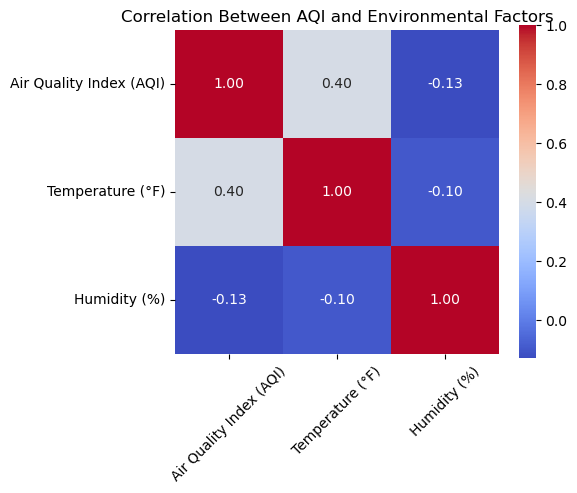

In [ ]:
# Map for cleaner names
readable_labels = {
    'AQI': 'Air Quality Index (AQI)',
    'Arithmetic Mean_TEMP': 'Temperature (°F)',
    'Arithmetic Mean_RH_DP': 'Humidity (%)'
}

# Columns of interest
corr_columns = ['AQI', 'Arithmetic Mean_TEMP', 'Arithmetic Mean_RH_DP']

# Rename columns temporarily
corr_data = df[corr_columns].dropna().rename(columns=readable_labels)

# Recompute correlation
corr_matrix = corr_data.corr()

# Plot again
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Between AQI and Environmental Factors')
plt.xticks(rotation=45)  # Rotate if needed
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


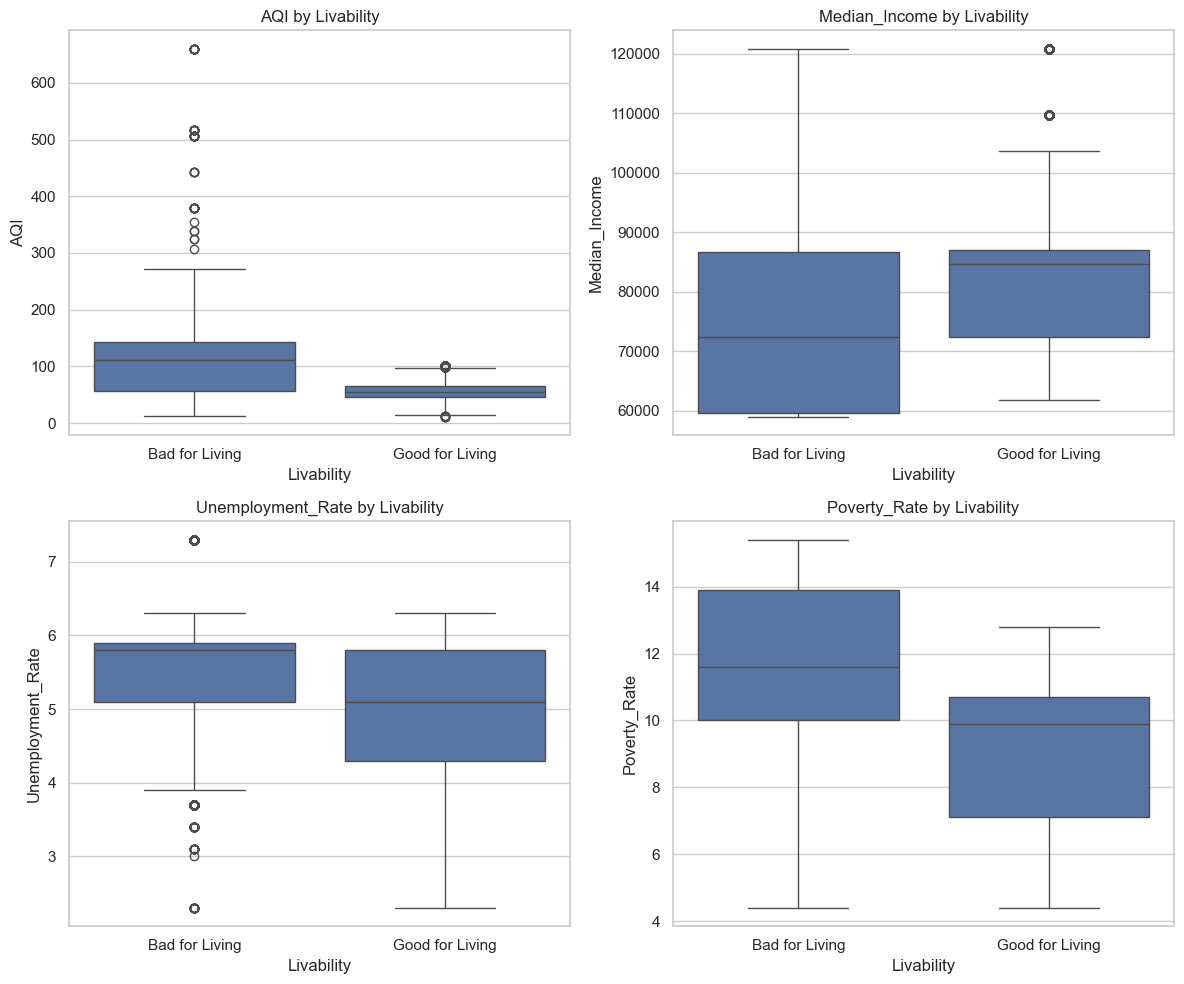

In [11]:
df = pd.read_csv('data/Merged_AQI_Income_Poverty_Unemployment_Livability.csv')
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['AQI', 'Median_Income', 'Unemployment_Rate', 'Poverty_Rate']
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(x='Livability', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature} by Livability')
    ax.set_xlabel('Livability')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()
